In [66]:
#importing the basic packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report ,confusion_matrix, accuracy_score

In [67]:
#loading the dataset

df = pd.read_csv("C:\\Users\\bhara\\Downloads\\Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# EDA and Preprocessing

In [118]:
#Checking the shape of the dataset
df.shape

(10000, 30)

In [119]:
#Listing the features of the dataset
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'BalanceZero', 'BalanceToSalaryRatio',
       'ProductUsage', 'Geography_Germany', 'Geography_Spain', 'Male_Germany',
       'Male_Spain', 'AgeGroup_26-35', 'AgeGroup_36-45', 'AgeGroup_46-55',
       'AgeGroup_56-65', 'AgeGroup_66-75', 'AgeGroup_76-85', 'AgeGroup_86-95',
       'TenureGroup_3-5', 'TenureGroup_6-7', 'TenureGroup_8-10'],
      dtype='object')

In [68]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [69]:
#Checking for any null values in dataset
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [70]:
#checking for any duplicated values in the dataset
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


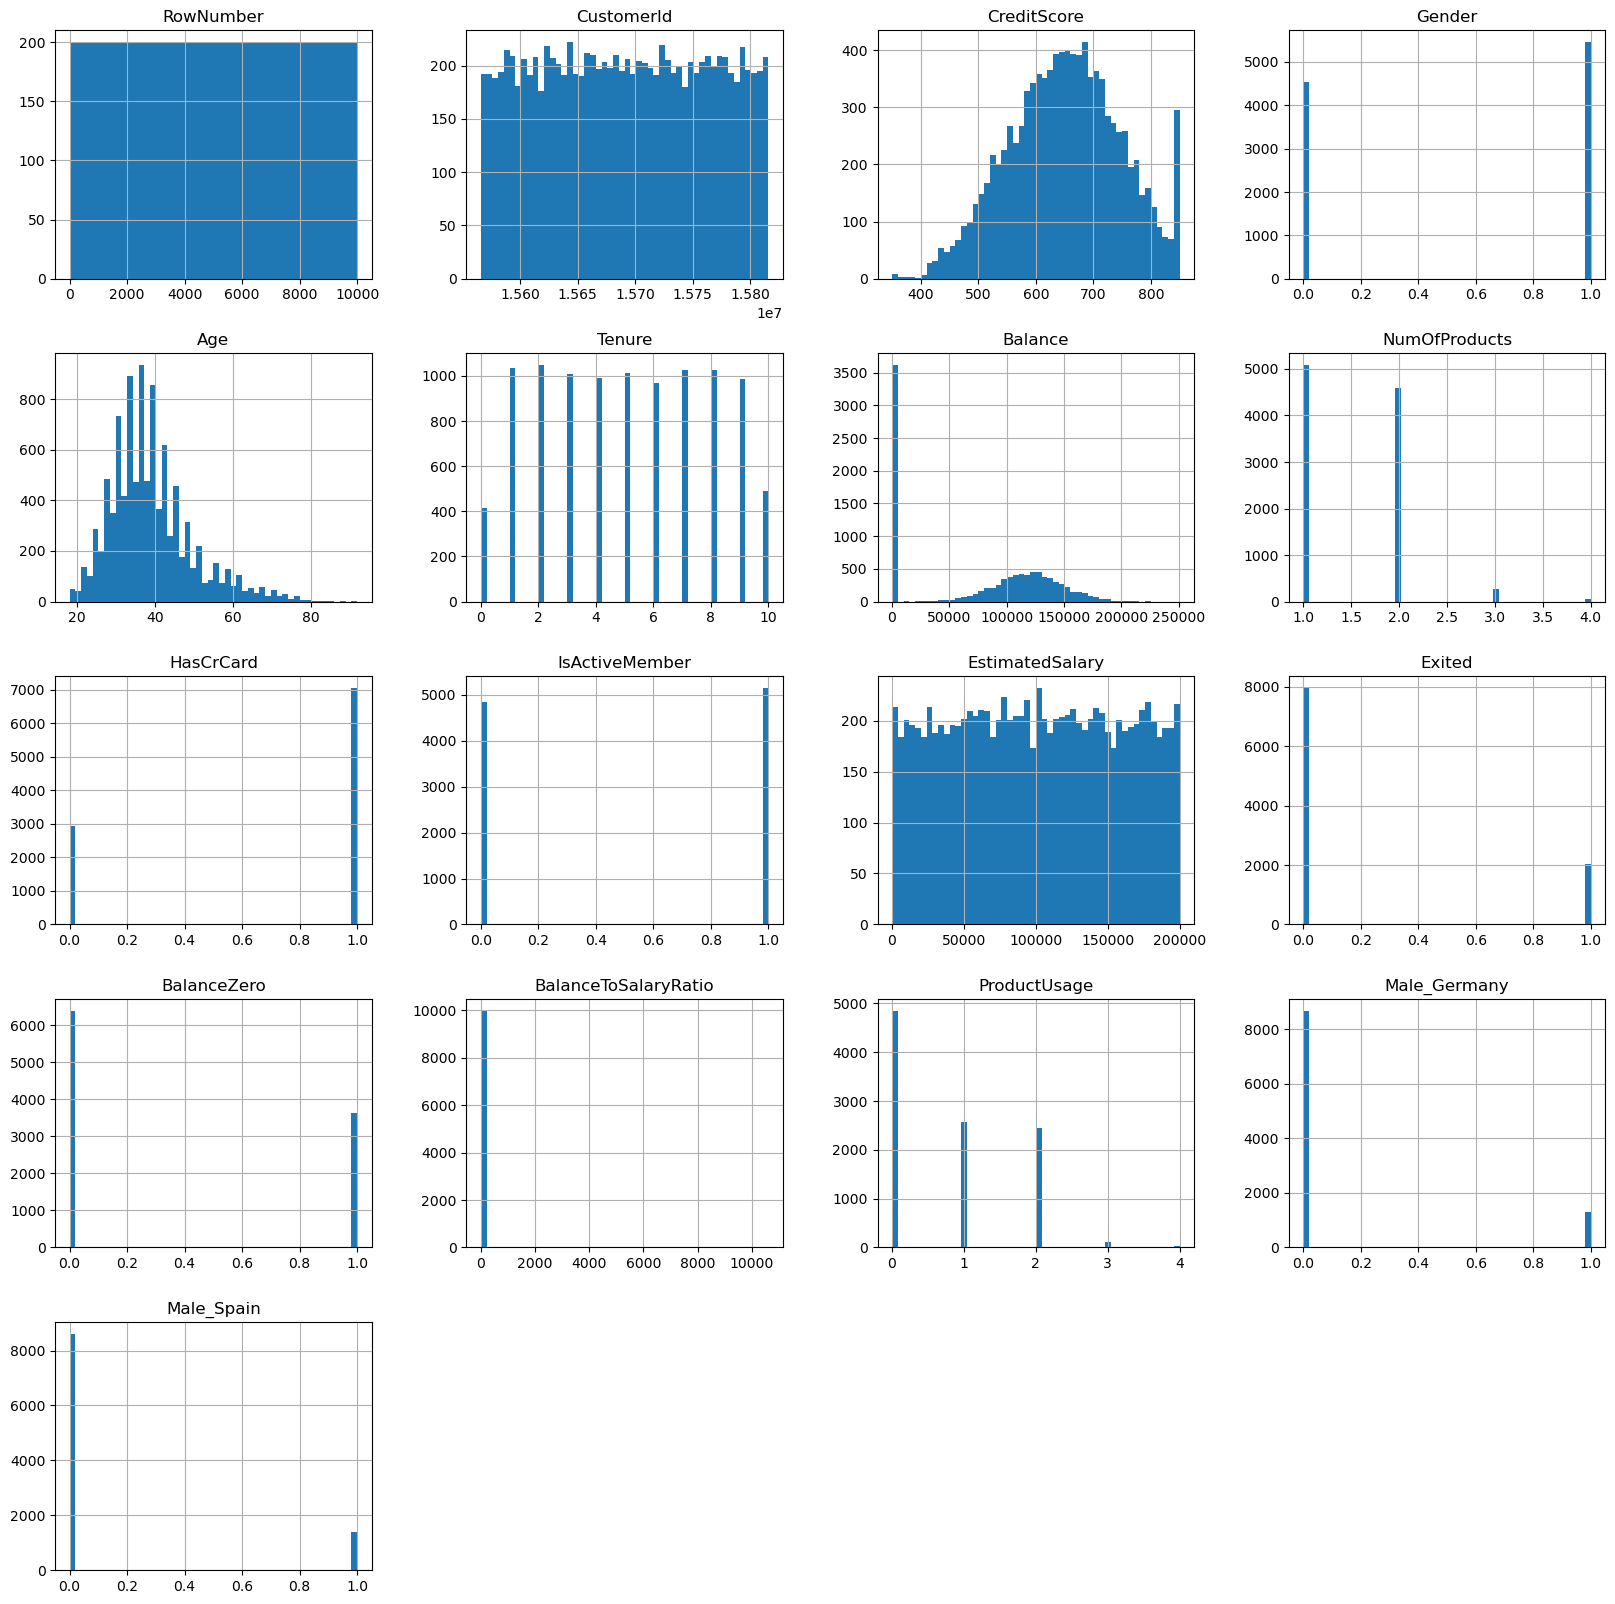

In [122]:
#Plotting the data distribution
df.hist(bins = 50,figsize = (20,20))
plt.show()

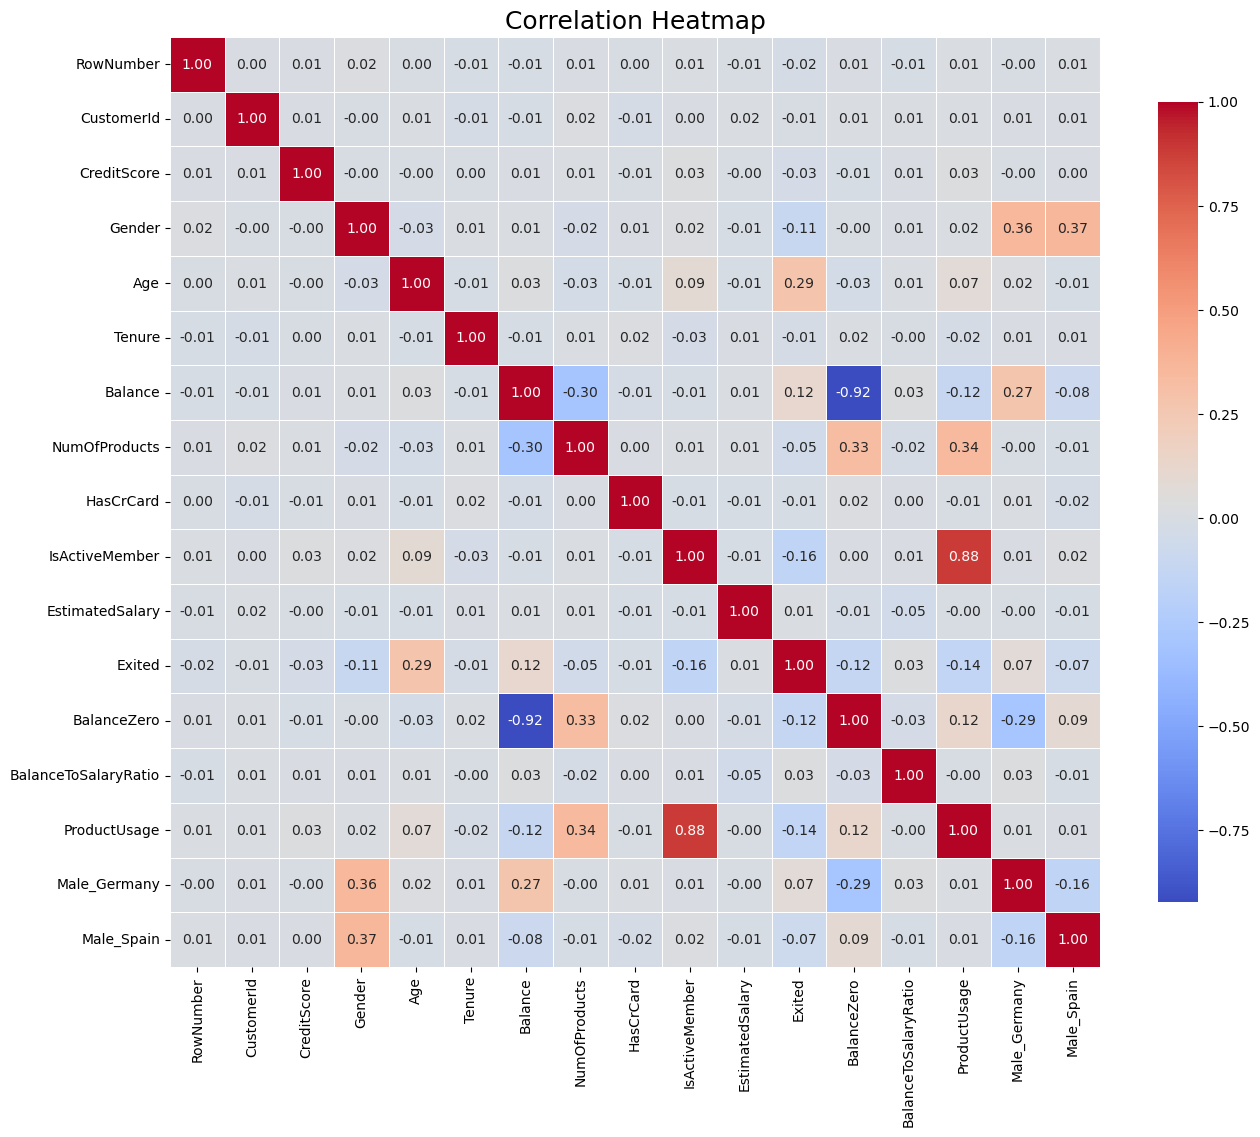

In [127]:
#Correlation Heatmap

# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Set up the matplotlib figure
plt.figure(figsize=(15, 13))

# Draw the heatmap with the numeric data
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .8})

# Add title to the heatmap
plt.title('Correlation Heatmap', fontsize=18)

# Show the plot
plt.show()


In [131]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,...,AgeGroup_26-35,AgeGroup_36-45,AgeGroup_46-55,AgeGroup_56-65,AgeGroup_66-75,AgeGroup_76-85,AgeGroup_86-95,TenureGroup_3-5,TenureGroup_6-7,TenureGroup_8-10
count,10000.00000,1.000000e+04,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,NaN,NaN,2932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,2,2,2,2,2,2,2
top,NaN,NaN,Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
freq,NaN,NaN,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6458,6264,8689,9464,9781,9958,9997,6990,8005,7501
mean,5000.50000,1.569094e+07,NaN,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2886.89568,7.193619e+04,NaN,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.00000,1.556570e+07,NaN,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2500.75000,1.562853e+07,NaN,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5000.50000,1.569074e+07,NaN,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7500.25000,1.575323e+07,NaN,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
#label Encoder

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df = pd.get_dummies(df, columns=['Geography'],drop_first= True)

In [72]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [75]:
features = ['CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard',
            'IsActiveMember','EstimatedSalary','Geography_Germany','Geography_Spain']
X= df[features]
y= df['Exited']

# Splitting the dataset into training and testing dataset

In [128]:
# Splitting the dataset into train and test sets: 80-20 split

X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.2 , random_state=42)
X_train.shape, X_test.shape

((8000, 25), (2000, 25))

In [80]:
#Scaling the dataset

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
X_train[:5],X_test[:5]

(array([[ 0.35649971,  0.91324755, -0.6557859 ,  0.34567966, -1.21847056,
          0.80843615,  0.64920267,  0.97481699,  1.36766974, -0.57946723,
         -0.57638802],
        [-0.20389777,  0.91324755,  0.29493847, -0.3483691 ,  0.69683765,
          0.80843615,  0.64920267,  0.97481699,  1.6612541 ,  1.72572313,
         -0.57638802],
        [-0.96147213,  0.91324755, -1.41636539, -0.69539349,  0.61862909,
         -0.91668767,  0.64920267, -1.02583358, -0.25280688, -0.57946723,
          1.73494238],
        [-0.94071667, -1.09499335, -1.13114808,  1.38675281,  0.95321202,
         -0.91668767,  0.64920267, -1.02583358,  0.91539272, -0.57946723,
         -0.57638802],
        [-1.39733684,  0.91324755,  1.62595257,  1.38675281,  1.05744869,
         -0.91668767, -1.54035103, -1.02583358, -1.05960019, -0.57946723,
         -0.57638802]]),
 array([[-0.57749609,  0.91324755, -0.6557859 , -0.69539349,  0.32993735,
          0.80843615, -1.54035103, -1.02583358, -1.01960511,  1.72572

This dataset is used for a supervised machine learning task, specifically a classification problem. The goal is to predict customer churn, where the target variable indicates whether a customer has churned (1) or not (0). The classification models considered for training on this dataset include:

  1) Random Forest
  2) Logistic Regression
  3) Support Vector Machine (SVM)
  4) K-Nearest Neighbor (KNN)
  5) Gradient Boosting Classfier

# Random Forest

We are using the Random Forest model in this churn prediction task because it is a robust ensemble learning method
that combines multiple decision trees to improve predictive accuracy and reduce overfitting. It can handle large 
datasets with high dimensionality and automatically manages interactions between features, making it well-suited 
for complex classification problems like churn prediction. Additionally, Random Forest provides feature importance
scores, which help in understanding the impact of different variables on the model's predictions.

In [84]:
#Random Forest Classfier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [85]:
y_pred= model.predict(X_test)

In [86]:
#computing the accuracy of the model performance

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test,y_pred)

In [87]:
#printing the acuuracy results 

print(conf_matrix)
print(class_report)
print(accuracy)

[[1551   56]
 [ 211  182]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000

0.8665


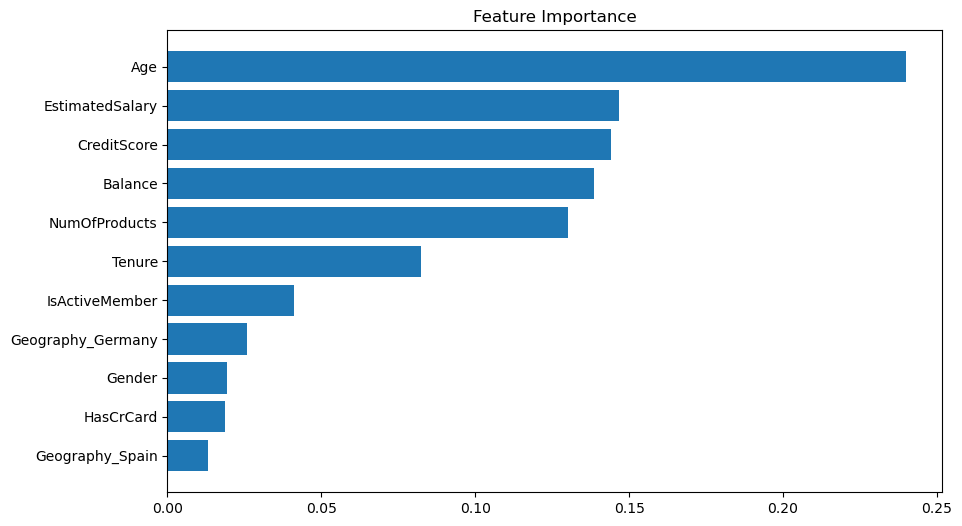

In [90]:
#Plotting the important features 

importances = model.feature_importances_  
indices = np.argsort(importances)[::-1]
names = [features[i] for i in indices]

plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importances[indices])
plt.yticks(range(X.shape[1]), names)  # 'x' should be 'X' to match your dataset
plt.gca().invert_yaxis()  # Optional: Invert y-axis for better visualization
plt.show()


# Logistic Regression

We are using Logistic Regression in this churn prediction task because it’s a straightforward model that offers interpretable results, making it easy to understand the factors influencing churn. It’s effective for binary classification and provides
quick training and deployment, especially when there’s a clear linear relationship between features and the target variable.

In [91]:
#Logistic regression model

from sklearn.linear_model import LogisticRegression

#Build and train the logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

#Make Predictions
y_pred_log_reg = log_reg.predict(X_test)

#Evaluate the Model
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
class_report_log_reg = classification_report(y_test, y_pred_log_reg)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

#printing the results
print(conf_matrix_log_reg , class_report_log_reg ,accuracy_log_reg)

[[1543   64]
 [ 314   79]]               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000
 0.811


# Support Vector Machine

We are using Support Vector Machine (SVM) in this churn prediction task because it is effective at finding the optimal boundary
between classes, even in high-dimensional spaces. SVM is particularly useful for handling complex data with non-linear 
relationships, thanks to its ability to apply kernel functions. It also aims to maximize the margin between classes, 
improving the model's generalization to unseen data.

In [94]:
#Support Vector Machine model
from sklearn.svm import SVC

#Build and train the SVM model
svm_model= SVC(kernel= 'linear',random_state=42)
svm_model.fit(X_train , y_train)

#Make Predictions
y_pred_svm = svm_model.predict(X_test)

#Evaluate the model
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm =classification_report(y_test, y_pred_svm)
accuracy_svm = accuracy_score(y_test , y_pred_svm)

#printing the results
print(conf_matrix_svm,class_report_svm, accuracy_svm)

[[1607    0]
 [ 393    0]]               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000
 0.8035


C:\Users\bhara\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bhara\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bhara\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# K Nearest Neighbor (KNN) 

We are using K-Nearest Neighbors (KNN) in this churn prediction task because it’s a simple, non-parametric model that makes predictions based on the closest data points in the feature space. KNN is effective for capturing local patterns and relationships in the data, making it useful for datasets where similar customers are likely to exhibit similar behavior. Additionally, KNN is easy to understand and implement, with no assumptions about the underlying data distribution.

In [95]:
from sklearn.neighbors import KNeighborsClassifier

#Build and train the KNN model
knn_model= KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

#Make Predictions
y_pred_knn = knn_model.predict(X_test)

#Evaluate the model 
conf_matrix_knn = confusion_matrix(y_test , y_pred_knn)
class_report_knn= classification_report(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test , y_pred_knn)

#printing the results
print(conf_matrix_knn, class_report_knn ,accuracy_knn)

[[1514   93]
 [ 247  146]]               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1607
           1       0.61      0.37      0.46       393

    accuracy                           0.83      2000
   macro avg       0.74      0.66      0.68      2000
weighted avg       0.81      0.83      0.81      2000
 0.83


# Gradient Boosting Classifier

We are using Gradient Boosting Classifier in this churn prediction task because it is a powerful ensemble technique that builds models sequentially, each correcting the errors of the previous one. This approach allows it to achieve high accuracy by combining multiple weak learners into a strong predictor. Gradient Boosting is effective at handling complex patterns in data and is particularly strong in minimizing bias and variance, making it well-suited for predicting customer churn.

In [103]:
#Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

#Build and train the Gradient Boosting Model
gbm_model = GradientBoostingClassifier(n_estimators=100,random_state=42)
gbm_model.fit(X_train , y_train)

#Make predictions 
y_pred_gbm = gbm_model.predict(X_test)

#Evaluate the model
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
class_report_gbm = classification_report(y_test , y_pred_gbm)
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)

#printing the results 
print(conf_matrix_gbm , class_report_gbm, accuracy_gbm)

[[1543   64]
 [ 201  192]]               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000
 0.8675


# MODEL COMPARISON

# Feature Selection

We have performed feature selection in our model to enhance its performance by identifying and retaining the most relevant features for predicting churn. This process helps in reducing dimensionality, improving model accuracy, and decreasing computation time by eliminating redundant or irrelevant features. Effective feature selection ensures that the model focuses on the most impactful variables, leading to more robust and interpretable results.

In [104]:
#feature enginnering

import pandas as pd

# Load the dataset
df = pd.read_csv("C:\\Users\\bhara\\Downloads\\Churn_Modelling.csv")

# Binary feature for balance (1 if balance is zero, else 0)
df['BalanceZero'] = (df['Balance'] == 0).astype(int)

# Age Groups
df['AgeGroup'] = pd.cut(df['Age'], 
                        bins=[18, 25, 35, 45, 55, 65, 75, 85, 95], 
                        labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-95'])

# Balance to Salary Ratio
df['BalanceToSalaryRatio'] = df['Balance'] / df['EstimatedSalary']

# Interaction feature between NumOfProducts and IsActiveMember
df['ProductUsage'] = df['NumOfProducts'] * df['IsActiveMember']

# Tenure grouping
df['TenureGroup'] = pd.cut(df['Tenure'], 
                           bins=[0, 2, 5, 7, 10], 
                           labels=['0-2', '3-5', '6-7', '8-10'])


In [105]:
#label Encoding 

label_encoder=LabelEncoder()
df['Gender']=label_encoder.fit_transform(df['Gender'])
df = pd.get_dummies(df,columns=['Geography'], drop_first=True)
df['Male_Germany']=df['Gender']*df['Geography_Germany']
df['Male_Spain'] = df['Gender']*df['Geography_Spain']

In [107]:
#one hot encoding for 'AgeGroup' and 'TenureGroup'
df = pd.get_dummies(df, columns=['AgeGroup','TenureGroup'],drop_first=True)

In [109]:
#identifying the important features
features = ['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary',
            'Geography_Germany','Geography_Spain','BalanceZero','BalanceToSalaryRatio','ProductUsage','Male_Germany',
            'Male_Spain'] +[col for col in df.columns if 'AgeGroup_' in col or 'TenureGroup_' in col]
X = df[features]
y = df['Exited']

In [113]:
# Splitting the dataset into train and test sets: 80-20 split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
#scaling 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Random Forest Classifier after feature selection
model=RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [116]:
#computing the accuracy of the model 
performanceconf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test,y_pred)

In [117]:
#printing the results 
print(conf_matrix)
print(class_report)
print(accuracy)

[[1547   60]
 [ 210  183]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000

0.865
